In [1]:
pip install numpy pandas seaborn matplotlib scipy scikit-learn


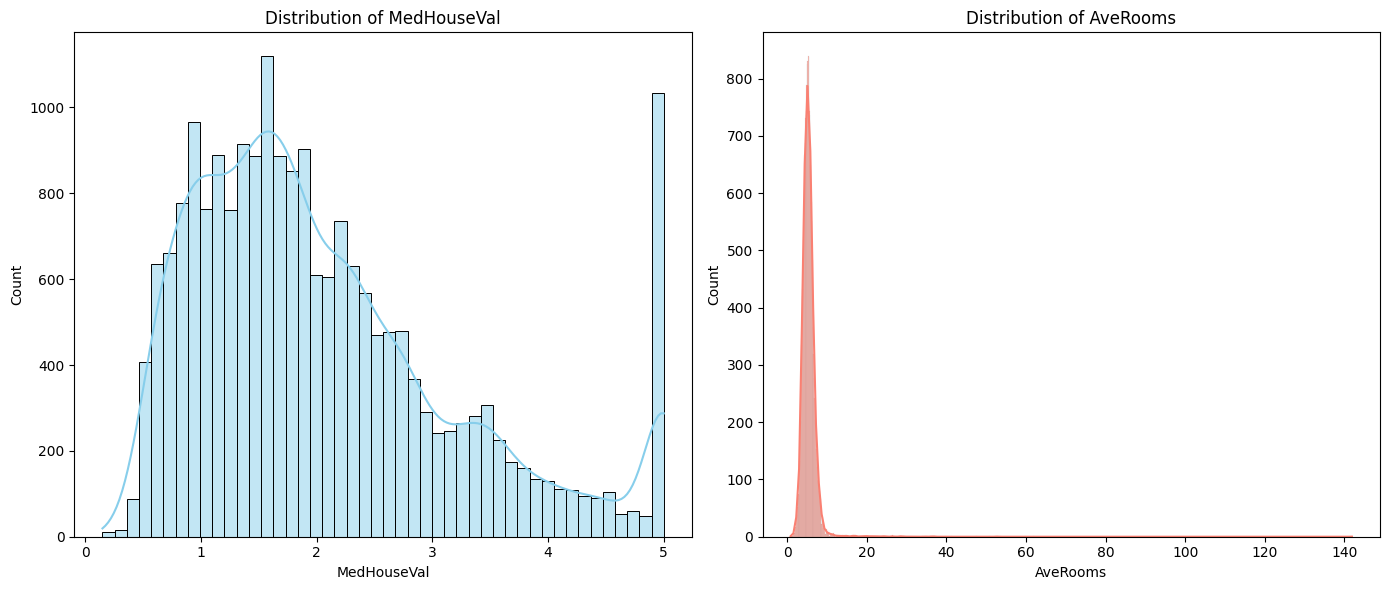

            Statistic  MedHouseVal    AveRooms
0                Mean     2.068558    5.429000
1              Median     1.797000    5.229129
2            Variance     1.331615    6.121533
3  Standard Deviation     1.153956    2.474173
4            Skewness     0.977763   20.697869
5            Kurtosis     0.327870  879.353264

T-Test Results: t-statistic = -31.7533457810166, p-value = 4.4277296406464777e-216

Probability that MedHouseVal is above average in high occupancy zones: 0.4012596899224806
Probability that MedHouseVal is above average in low occupancy zones: 0.4248062015503876


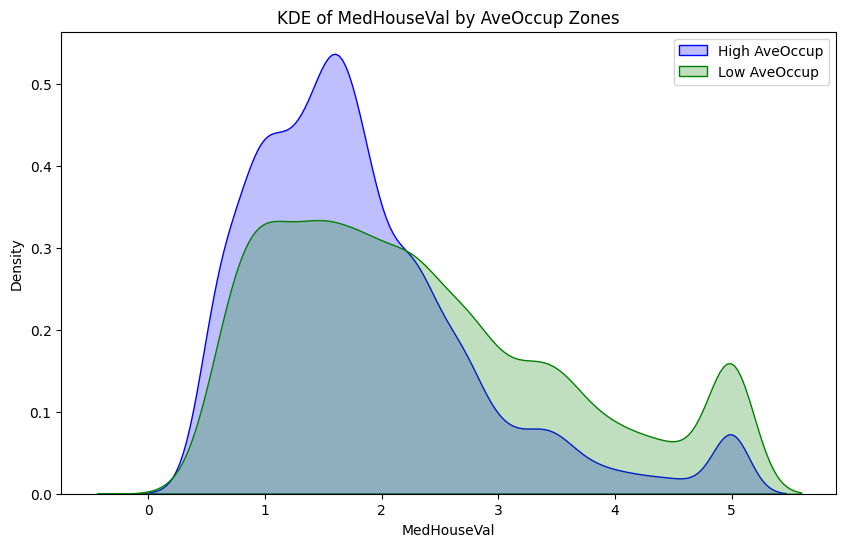

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Exploratory Data Analysis (EDA) on MedHouseVal and AveRooms
med_house_val = df['MedHouseVal']
ave_rooms = df['AveRooms']

# Visualize distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(med_house_val, kde=True, color="skyblue")
plt.title("Distribution of MedHouseVal")
plt.xlabel("MedHouseVal")

plt.subplot(1, 2, 2)
sns.histplot(ave_rooms, kde=True, color="salmon")
plt.title("Distribution of AveRooms")
plt.xlabel("AveRooms")

plt.tight_layout()
plt.show()

# Calculate summary statistics
summary_statistics = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'],
    'MedHouseVal': [med_house_val.mean(), med_house_val.median(), med_house_val.var(),
                    med_house_val.std(), med_house_val.skew(), med_house_val.kurt()],
    'AveRooms': [ave_rooms.mean(), ave_rooms.median(), ave_rooms.var(),
                 ave_rooms.std(), ave_rooms.skew(), ave_rooms.kurt()]
})

print(summary_statistics)

# Conduct a T-Test: Comparing MedHouseVal for homes with AveOccup above and below the median
median_ave_occup = df['AveOccup'].median()
high_occup = df[df['AveOccup'] > median_ave_occup]['MedHouseVal']
low_occup = df[df['AveOccup'] <= median_ave_occup]['MedHouseVal']

t_stat, p_value = stats.ttest_ind(high_occup, low_occup)
print(f"\nT-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

# Probability that MedHouseVal is above the average for its zone
mean_high_occup = high_occup.mean()
mean_low_occup = low_occup.mean()

prob_high_occup = (high_occup > mean_high_occup).mean()
prob_low_occup = (low_occup > mean_low_occup).mean()

print(f"\nProbability that MedHouseVal is above average in high occupancy zones: {prob_high_occup}")
print(f"Probability that MedHouseVal is above average in low occupancy zones: {prob_low_occup}")

# KDE plots for MedHouseVal in high and low occupancy zones
plt.figure(figsize=(10, 6))
sns.kdeplot(high_occup, fill=True, color="blue", label='High AveOccup')
sns.kdeplot(low_occup, fill=True, color="green", label='Low AveOccup')
plt.title("KDE of MedHouseVal by AveOccup Zones")
plt.xlabel("MedHouseVal")
plt.legend()
plt.show()


Pearson correlation between total crashes and alcohol involvement: 0.8526132163334913
Spearman correlation between total crashes and alcohol involvement: 0.894576069808138

Probability that total crashes exceed the median in states with high alcohol involvement: 0.9545454545454546


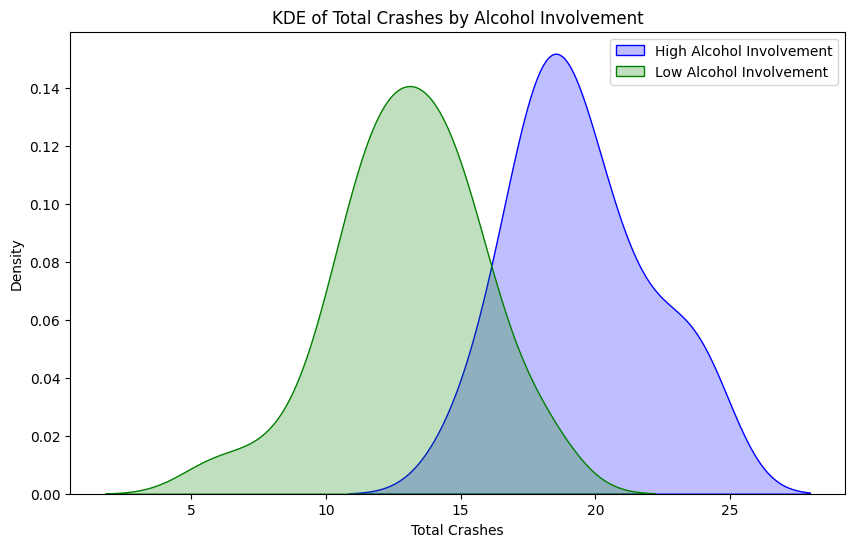


The Pearson correlation between total crashes and alcohol involvement is 0.85, and the Spearman correlation is 0.89.
Both correlations indicate a positive relationship, meaning that as alcohol involvement increases, total crashes tend to increase.
The Spearman correlation is slightly higher, which suggests that the relationship is stronger in terms of ranking states by these two variables.

The probability that a state’s total crashes exceed the median, conditional on alcohol involvement being above the average, is 0.95.
This result implies that states with higher alcohol involvement rates are more likely to have total crashes exceeding the median, highlighting the impact of alcohol on traffic safety.

The KDE plot further supports this conclusion, showing that states with higher alcohol involvement tend to have higher total crash rates.
These findings suggest that addressing alcohol involvement in traffic can be a significant step toward improving overall traffic safety.



In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = sns.load_dataset('car_crashes')

# Perform a correlation analysis using Pearson and Spearman coefficients
pearson_corr = df['total'].corr(df['alcohol'], method='pearson')
spearman_corr = df['total'].corr(df['alcohol'], method='spearman')

print(f"Pearson correlation between total crashes and alcohol involvement: {pearson_corr}")
print(f"Spearman correlation between total crashes and alcohol involvement: {spearman_corr}")

# Calculate the probability that a state’s total crashes exceed the median, conditional on alcohol involvement rate being above average
median_total_crashes = df['total'].median()
mean_alcohol_rate = df['alcohol'].mean()

# Filter data based on alcohol involvement rate
high_alcohol = df[df['alcohol'] > mean_alcohol_rate]
low_alcohol = df[df['alcohol'] <= mean_alcohol_rate]

# Probability that total crashes exceed the median in high alcohol involvement states
prob_high_alcohol = (high_alcohol['total'] > median_total_crashes).mean()

print(f"\nProbability that total crashes exceed the median in states with high alcohol involvement: {prob_high_alcohol}")

# KDE plots for total crashes in high and low alcohol involvement states
plt.figure(figsize=(10, 6))
sns.kdeplot(high_alcohol['total'], fill=True, color="blue", label='High Alcohol Involvement')
sns.kdeplot(low_alcohol['total'], fill=True, color="green", label='Low Alcohol Involvement')
plt.title("KDE of Total Crashes by Alcohol Involvement")
plt.xlabel("Total Crashes")
plt.legend()
plt.show()

# Interpretation of findings
interpretation = f"""
The Pearson correlation between total crashes and alcohol involvement is {pearson_corr:.2f}, and the Spearman correlation is {spearman_corr:.2f}.
Both correlations indicate a positive relationship, meaning that as alcohol involvement increases, total crashes tend to increase.
The Spearman correlation is slightly higher, which suggests that the relationship is stronger in terms of ranking states by these two variables.

The probability that a state’s total crashes exceed the median, conditional on alcohol involvement being above the average, is {prob_high_alcohol:.2f}.
This result implies that states with higher alcohol involvement rates are more likely to have total crashes exceeding the median, highlighting the impact of alcohol on traffic safety.

The KDE plot further supports this conclusion, showing that states with higher alcohol involvement tend to have higher total crash rates.
These findings suggest that addressing alcohol involvement in traffic can be a significant step toward improving overall traffic safety.
"""

print(interpretation)
